# CS480: Database Systems, Group Project
### Green Taxi Datasets

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import datetime

#### 1. First, we will import the data in the system

In [2]:
green = pd.read_csv('green_tripdata_2015-01.csv')
# Here we are storing all the column names in a array named 'columns'
columns = green.columns
print(columns)

Index(['VendorID', 'lpep_pickup_datetime', 'Lpep_dropoff_datetime',
       'Store_and_fwd_flag', 'RateCodeID', 'Pickup_longitude',
       'Pickup_latitude', 'Dropoff_longitude', 'Dropoff_latitude',
       'Passenger_count', 'Trip_distance', 'Fare_amount', 'Extra', 'MTA_tax',
       'Tip_amount', 'Tolls_amount', 'Ehail_fee', 'improvement_surcharge',
       'Total_amount', 'Payment_type', 'Trip_type '],
      dtype='object')


#### 2. Now, we will get the summary of the datasets and then we will clean up the dataset

In [3]:
green.describe()
# print(green.dtypes)

,VendorID,RateCodeID,Pickup_longitude,Pickup_latitude,Dropoff_longitude,Dropoff_latitude,Passenger_count,Trip_distance,Fare_amount,Extra,MTA_tax,Tip_amount,Tolls_amount,Ehail_fee,improvement_surcharge,Total_amount,Payment_type,Trip_type
count,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,0.0,1.048575e+06,1.048575e+06,1.048575e+06,1.048570e+06
mean,1.778683e+00,1.098100e+00,-7.381823e+01,4.068497e+01,-7.381280e+01,4.068029e+01,1.389390e+00,2.782559e+00,1.173290e+01,3.427971e-01,4.865826e-01,1.116572e+00,9.529348e-02,NaN,2.807908e-01,1.499850e+01,1.561091e+00,1.022894e+00
std,4.151334e-01,6.505393e-01,2.947688e+00,1.625452e+00,3.009728e+00,1.659509e+00,1.078429e+00,2.952046e+00,9.551922e+00,3.605977e-01,8.480691e-02,3.804000e+00,1.167153e+00,NaN,7.344232e-02,9.668206e+02,5.218143e-01,1.495658e-01
min,1.000000e+00,1.000000e+00,-7.535131e+01,0.000000e+00,-7.543967e+01,0.000000e+00,0.000000e+00,0.000000e+00,-4.000000e+02,-1.000000e+00,-5.000000e-01,-1.450000e+01,-1.816000e+01,NaN,0.000000e+00,-4.000000e+02,1.000000e+00,1.000000e+00
25%,2.000000e+00,1.000000e+00,-7.395934e+01,4.070041e+01,-7.396799e+01,4.070253e+01,1.000000e+00,1.010000e+00,6.000000e+00,0.000000e+00,5.000000e-01,0.000000e+00,0.000000e+00,NaN,3.000000e-01,7.800000e+00,1.000000e+00,1.000000e+00
50%,2.000000e+00,1.000000e+00,-7.394547e+01,4.074686e+01,-7.394550e+01,4.074789e+01,1.000000e+00,1.830000e+00,9.000000e+00,5.000000e-01,5.000000e-01,0.000000e+00,0.000000e+00,NaN,3.000000e-01,1.080000e+01,2.000000e+00,1.000000e+00
75%,2.000000e+00,1.000000e+00,-7.391782e+01,4.080240e+01,-7.391185e+01,4.079070e+01,1.000000e+00,3.540000e+00,1.450000e+01,5.000000e-01,5.000000e-01,1.750000e+00,0.000000e+00,NaN,3.000000e-01,1.700000e+01,2.000000e+00,1.000000e+00
max,2.000000e+00,9.900000e+01,0.000000e+00,4.291825e+01,0.000000e+00,4.291817e+01,9.000000e+00,8.304000e+02,8.000000e+02,1.000000e+00,8.000000e-01,4.900000e+02,8.698800e+02,NaN,3.000000e-01,9.899704e+05,5.000000e+00,2.000000e+00


In [4]:
# Getting the values which needs to be cleaned up before procedding further
print("\u0332".join('Number of Null data values in each columns:'))
print(green.isnull().sum())
print('')
print("\u0332".join('Number of Datasets:'), len(green.index))

N̲u̲m̲b̲e̲r̲ ̲o̲f̲ ̲N̲u̲l̲l̲ ̲d̲a̲t̲a̲ ̲v̲a̲l̲u̲e̲s̲ ̲i̲n̲ ̲e̲a̲c̲h̲ ̲c̲o̲l̲u̲m̲n̲s̲:
VendorID                       0
lpep_pickup_datetime           0
Lpep_dropoff_datetime          0
Store_and_fwd_flag             0
RateCodeID                     0
Pickup_longitude               0
Pickup_latitude                0
Dropoff_longitude              0
Dropoff_latitude               0
Passenger_count                0
Trip_distance                  0
Fare_amount                    0
Extra                          0
MTA_tax                        0
Tip_amount                     0
Tolls_amount                   0
Ehail_fee                1048575
improvement_surcharge          0
Total_amount                   0
Payment_type                   0
Trip_type                      5
dtype: int64

N̲u̲m̲b̲e̲r̲ ̲o̲f̲ ̲D̲a̲t̲a̲s̲e̲t̲s̲: 1048575


In [5]:
# Since the number of null values in the 'Ehail_fee' column is equal to the number of rows in the dataset
# Therefore, we will drop the whole column due to its irrelevance.

green = green.drop(columns=['Ehail_fee'])
print("\u0332".join('Number of Null data values in each columns:'))
print(green.isnull().sum())

N̲u̲m̲b̲e̲r̲ ̲o̲f̲ ̲N̲u̲l̲l̲ ̲d̲a̲t̲a̲ ̲v̲a̲l̲u̲e̲s̲ ̲i̲n̲ ̲e̲a̲c̲h̲ ̲c̲o̲l̲u̲m̲n̲s̲:
VendorID                 0
lpep_pickup_datetime     0
Lpep_dropoff_datetime    0
Store_and_fwd_flag       0
RateCodeID               0
Pickup_longitude         0
Pickup_latitude          0
Dropoff_longitude        0
Dropoff_latitude         0
Passenger_count          0
Trip_distance            0
Fare_amount              0
Extra                    0
MTA_tax                  0
Tip_amount               0
Tolls_amount             0
improvement_surcharge    0
Total_amount             0
Payment_type             0
Trip_type                5
dtype: int64


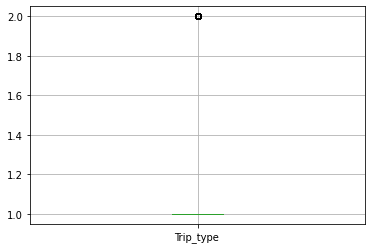

In [6]:
# Now we will boxplot the 'Trip_type' column
boxplot = green.boxplot(column=['Trip_type '])

In [7]:
# In the boxplot, we can see that '2.0' is an outlier, therefore majority of the dataset have value '1'
# So, we will replace the null values with '1'
green['Trip_type '] = green['Trip_type '].fillna(1)

In [8]:
# Now there are no null values in the dataset
# Update the columns variable according to the new cleaned up value
columns = green.columns
print("\u0332".join('Number of Null data values in each columns:'))
print(green.isnull().sum())

N̲u̲m̲b̲e̲r̲ ̲o̲f̲ ̲N̲u̲l̲l̲ ̲d̲a̲t̲a̲ ̲v̲a̲l̲u̲e̲s̲ ̲i̲n̲ ̲e̲a̲c̲h̲ ̲c̲o̲l̲u̲m̲n̲s̲:
VendorID                 0
lpep_pickup_datetime     0
Lpep_dropoff_datetime    0
Store_and_fwd_flag       0
RateCodeID               0
Pickup_longitude         0
Pickup_latitude          0
Dropoff_longitude        0
Dropoff_latitude         0
Passenger_count          0
Trip_distance            0
Fare_amount              0
Extra                    0
MTA_tax                  0
Tip_amount               0
Tolls_amount             0
improvement_surcharge    0
Total_amount             0
Payment_type             0
Trip_type                0
dtype: int64


#### 3. Now,filter out the data which we need to use for our algorithms

In [9]:
dataset = green[['VendorID', 'lpep_pickup_datetime', 'Lpep_dropoff_datetime', 'Pickup_longitude', 'Pickup_latitude', 'Passenger_count', 'Trip_distance']]
print("\u0332".join('Dataset:'), len(dataset.index))
dataset = dataset[dataset.Passenger_count < 3]
dataset = dataset[dataset.Trip_distance != 0]
print("\u0332".join('Filtered Dataset:'), len(dataset.index))

D̲a̲t̲a̲s̲e̲t̲: 1048575
F̲i̲l̲t̲e̲r̲e̲d̲ ̲D̲a̲t̲a̲s̲e̲t̲: 940412


In [10]:
print("\u0332".join('Total Distance Travelled:'), dataset['Trip_distance'].sum())

T̲o̲t̲a̲l̲ ̲D̲i̲s̲t̲a̲n̲c̲e̲ ̲T̲r̲a̲v̲e̲l̲l̲e̲d̲: 2650504.5499999993


In [11]:
dataset.head()

,VendorID,lpep_pickup_datetime,Lpep_dropoff_datetime,Pickup_longitude,Pickup_latitude,Passenger_count,Trip_distance
0,2,01/01/15 0:34,01/01/15 0:38,-73.922592,40.754528,1,0.88
1,2,01/01/15 0:34,01/01/15 0:47,-73.952751,40.677711,1,3.08
2,1,01/01/15 0:34,01/01/15 0:38,-73.843010,40.719055,1,0.90
3,2,01/01/15 0:34,01/01/15 0:38,-73.860825,40.757793,1,0.85
4,2,01/01/15 0:34,01/01/15 1:09,-73.945183,40.783321,1,4.91


In [12]:
#
dataset['lpep_pickup_datetime'] = pd.to_datetime(dataset['lpep_pickup_datetime'])
dataset['Lpep_dropoff_datetime'] = pd.to_datetime(dataset['Lpep_dropoff_datetime'])
dataset

,VendorID,lpep_pickup_datetime,Lpep_dropoff_datetime,Pickup_longitude,Pickup_latitude,Passenger_count,Trip_distance
0,2,2015-01-01 00:34:00,2015-01-01 00:38:00,-73.922592,40.754528,1,0.88
1,2,2015-01-01 00:34:00,2015-01-01 00:47:00,-73.952751,40.677711,1,3.08
2,1,2015-01-01 00:34:00,2015-01-01 00:38:00,-73.843010,40.719055,1,0.90
3,2,2015-01-01 00:34:00,2015-01-01 00:38:00,-73.860825,40.757793,1,0.85
4,2,2015-01-01 00:34:00,2015-01-01 01:09:00,-73.945183,40.783321,1,4.91
...,...,...,...,...,...,...,...
1048569,1,2015-01-22 14:57:00,2015-01-22 15:08:00,-73.960815,40.801636,1,1.50
1048570,1,2015-01-22 14:56:00,2015-01-22 15:27:00,-73.959213,40.809345,1,4.20
1048571,1,2015-01-22 14:55:00,2015-01-22 15:13:00,-73.897095,40.675816,1,2.80
1048572,1,2015-01-22 14:55:00,2015-01-22 15:01:00,-73.874397,40.829514,1,1.10


In [13]:
# Separating two datasets with passanger count 1 and 2
passenger1_dataset = dataset[dataset.Passenger_count == 1]
passenger2_dataset = dataset[dataset.Passenger_count == 2]

In [14]:
# Dataset w
passenger1_dataset

,VendorID,lpep_pickup_datetime,Lpep_dropoff_datetime,Pickup_longitude,Pickup_latitude,Passenger_count,Trip_distance
0,2,2015-01-01 00:34:00,2015-01-01 00:38:00,-73.922592,40.754528,1,0.88
1,2,2015-01-01 00:34:00,2015-01-01 00:47:00,-73.952751,40.677711,1,3.08
2,1,2015-01-01 00:34:00,2015-01-01 00:38:00,-73.843010,40.719055,1,0.90
3,2,2015-01-01 00:34:00,2015-01-01 00:38:00,-73.860825,40.757793,1,0.85
4,2,2015-01-01 00:34:00,2015-01-01 01:09:00,-73.945183,40.783321,1,4.91
...,...,...,...,...,...,...,...
1048568,1,2015-01-22 14:58:00,2015-01-22 15:33:00,-73.965660,40.803318,1,3.70
1048569,1,2015-01-22 14:57:00,2015-01-22 15:08:00,-73.960815,40.801636,1,1.50
1048570,1,2015-01-22 14:56:00,2015-01-22 15:27:00,-73.959213,40.809345,1,4.20
1048571,1,2015-01-22 14:55:00,2015-01-22 15:13:00,-73.897095,40.675816,1,2.80


In [15]:
passenger2_dataset

,VendorID,lpep_pickup_datetime,Lpep_dropoff_datetime,Pickup_longitude,Pickup_latitude,Passenger_count,Trip_distance
9,2,2015-01-01 00:35:00,2015-01-01 00:42:00,-73.921402,40.766666,2,1.12
14,1,2015-01-01 00:35:00,2015-01-01 00:41:00,-73.899055,40.749989,2,1.60
21,2,2015-01-01 00:35:00,2015-01-01 00:44:00,-73.935745,40.753407,2,1.20
39,1,2015-01-01 00:34:00,2015-01-01 00:53:00,-73.966660,40.713779,2,5.50
48,2,2015-01-01 00:34:00,2015-01-01 00:54:00,-73.979340,40.642654,2,4.30
...,...,...,...,...,...,...,...
1048509,2,2015-01-22 16:01:00,2015-01-22 16:22:00,-73.942604,40.790771,2,2.76
1048515,2,2015-01-22 16:13:00,2015-01-22 16:23:00,-73.945068,40.834175,2,4.45
1048516,2,2015-01-22 16:21:00,2015-01-22 16:23:00,-73.995285,40.683735,2,0.20
1048548,2,2015-01-22 14:55:00,2015-01-22 15:22:00,-73.947762,40.825073,2,4.28
